<a href="https://colab.research.google.com/github/karolinavg/Evidencias-de-las-Actividades/blob/main/a00828210_pres_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Singapore Property Prices from 2017 to 2021**

**Description of Databaset**

---
Singapur is a city-state located in Asia, these past years it has become one of the 10 most expensive cities to live in. In average 1 square meter is worth 14,373 dollars. The database, which has a total of 92,270 rows, 11 columns, contains information of properties prices from a variety of towns from 2017 to 2021 in Singapore. 

##**Variables description**
---



The database has 11 variables which are:
* **month** (numerical) --> date of when was the data collected, includes monthe and year
* **town** (categorical) --> in which Singapore's town the house/apartment is located.
* **flat_type** (categorical) --> the type of flat 
* block (categorical) --> the number of block where the housing is located
* **street_name** (categorical) --> what is the name of the street where the housing is located
* storey_range (categorical) --> the range of floors inside the building from where the housing is located 
* **floor_area_sqm** (numerical) --> the floor area square meter (m^2)
* **flat_model** (categorical) --> the model of the flat
* lease_commence_date (numerical) --> year of when the lease began
* remaining_lease (numerical) --> it shows the reamaining years and months of the lease
* **resale_price** (numerical) --> the price in singapore dollar of the housing, 1 Singapore Dollar == 14.05 Mexican Peso


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
import statsmodels.api as sample_data
from sklearn import linear_model as LM
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [ ]:
data='/content/drive/MyDrive/5 SEMESTRE/Visualization of Data for Decision Making/Flat prices.csv'

In [ ]:
df=pd.read_csv(data)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [ ]:
type(data)

str

## 1. Has the price increased or decreased through the years?
The pademic made de price of housing decrease, but as soon as the economy started getting  better the prices are getting higher in a greater rate than before.

Text(0.5, 1.0, 'The average cost of housing from 2017 to 2021')

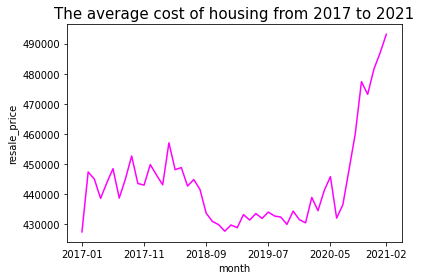

In [ ]:
sns.lineplot(data=df,
             x='month',
             y='resale_price',
             color='magenta',
             ci=None)
plt.xticks([0,10,20,30,40,49])
plt.title('The average cost of housing from 2017 to 2021',size=15)

## 2. Which are the 5 most expensive towns to live in? 

In [ ]:
df1 =df.copy()

In [ ]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
pt_price_town=df1.pivot_table(index=['town'],
                  values=['resale_price'],
                  aggfunc='mean').sort_values(by=['resale_price'],ascending=False)
top5 = pt_price_town.head()
top5

,resale_price
town,
BUKIT TIMAH,712396.243137
BISHAN,639652.640857
CENTRAL AREA,620021.011921
QUEENSTOWN,570809.994369
BUKIT MERAH,564240.003343


In [ ]:
type(pt_price_town)

pandas.core.frame.DataFrame

In [ ]:
type(df1)

pandas.core.frame.DataFrame

## 3. How has the prices changed in the 3 most expensive towns?

In [ ]:
top3_list=['BUKIT TIMAH','BISHAN','CENTRAL AREA']

In [ ]:
top3_filter=df[df['town'].isin(top3_list)]
top3_filter

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
126,2017-01,BISHAN,3 ROOM,22,SIN MING RD,10 TO 12,68.0,Improved,1973,55 years 09 months,275000.0
127,2017-01,BISHAN,3 ROOM,407,SIN MING AVE,10 TO 12,64.0,Simplified,1986,68 years 07 months,320000.0
128,2017-01,BISHAN,3 ROOM,105,BISHAN ST 12,04 TO 06,64.0,Simplified,1985,67 years 11 months,395000.0
129,2017-01,BISHAN,4 ROOM,167,BISHAN ST 13,04 TO 06,84.0,Simplified,1988,70 years 08 months,380000.0
130,2017-01,BISHAN,4 ROOM,167,BISHAN ST 13,04 TO 06,84.0,Simplified,1988,70 years 08 months,475000.0
...,...,...,...,...,...,...,...,...,...,...,...
90609,2021-02,CENTRAL AREA,4 ROOM,1B,CANTONMENT RD,37 TO 39,95.0,Type S1,2011,88 years 11 months,1000000.0
90610,2021-02,CENTRAL AREA,4 ROOM,10,JLN KUKOH,10 TO 12,107.0,Adjoined flat,1971,49 years 05 months,538000.0
90611,2021-02,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,34 TO 36,108.0,Type S2,2011,89 years,1138000.0
90612,2021-02,CENTRAL AREA,5 ROOM,1G,CANTONMENT RD,16 TO 18,105.0,Type S2,2011,88 years 11 months,1015000.0


Text(0.5, 1.0, 'The price of housing of the 3 most costly towns through the years')

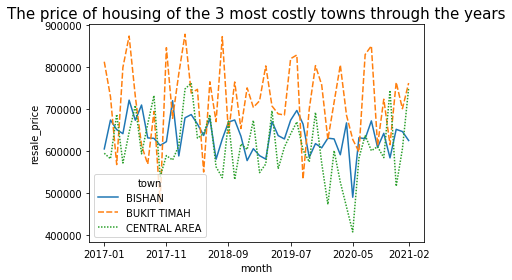

In [ ]:
sns.lineplot(data=top3_filter, 
             x="month", 
             y="resale_price", 
             hue="town",
             ci=None,
             style="town")

plt.xticks([0,10,20,30,40,49])
plt.title('The price of housing of the 3 most costly towns through the years',size=15)

## 4.Which town can be infered to have the most housing?

Text(0.5, 1.0, 'The amount of data recollected by town')

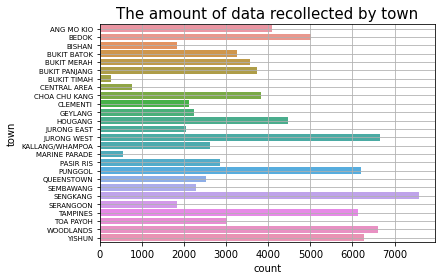

In [ ]:
sns.countplot(data=df,
                 y="town")
plt.yticks(fontsize=7)
plt.grid()
plt.title('The amount of data recollected by town',size=15)

## 5. What is the impact of the floor area on the price?
There is a small correlation between the floor area and the price, when the floor area increases the price increases aswell. 

Text(0.5, 1.0, 'The correlation between the price and the floor area')

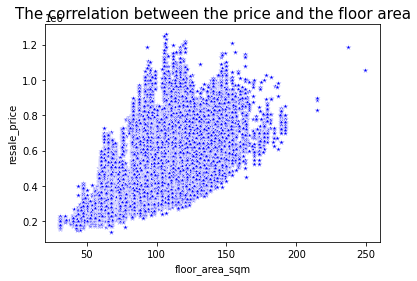

In [ ]:
sns.scatterplot(data=df, 
                x="floor_area_sqm", 
                y="resale_price",
                marker="*",
                color="b")
plt.title('The correlation between the price and the floor area',size=15)

## 6. Create a linear model for the correlation between the price and the floor area.
With this model we can predict the price of the housing depending on the floor area.

In [ ]:
x=pd.DataFrame(df1.floor_area_sqm)
y=pd.DataFrame(df1.resale_price)

In [ ]:
lm=LM.LinearRegression()
model_lm=lm.fit(x,y)
model_lm

LinearRegression()

In [ ]:
print('Model intercept is: ',model_lm.intercept_)
print('Model coefficient is: ',model_lm.coef_)
model_lm.score(x,y)

Model intercept is:  [51910.42126529]
Model coefficient is:  [[4019.46467721]]


0.3967966359213685

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [ ]:
regressor = LinearRegression() 

In [ ]:
regressor.fit(x_train, y_train) 

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

Text(0.5, 1.0, 'The correlation between price and floor area and the linear model')

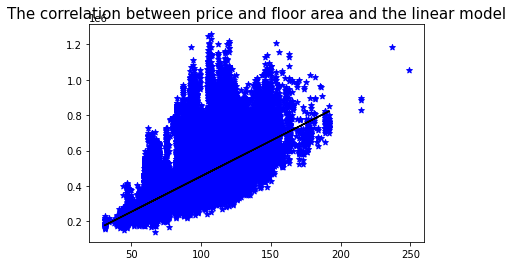

In [ ]:
plt.plot(x_test, y_pred,color='k') 
plt.scatter(x_train, y_train,color='b',marker='*') 
plt.title('The correlation between price and floor area and the linear model',size=15)

## 7. Does the flat type has any correlation with the flat model?



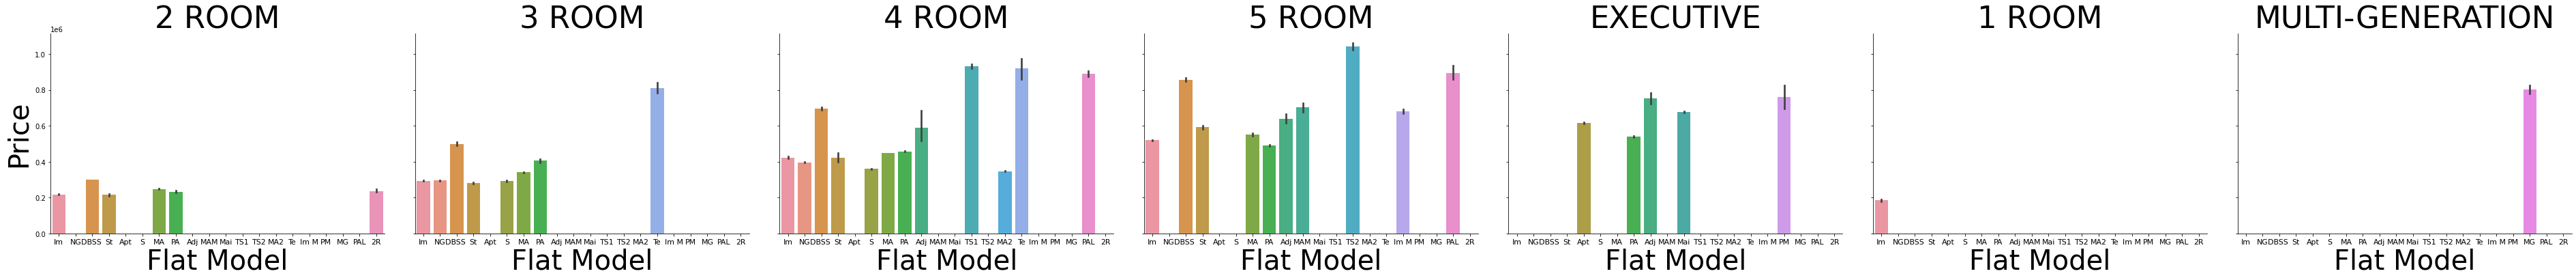

In [ ]:
c = sns.catplot(
    data=df, x="flat_model", y="resale_price", col="flat_type",
    kind="bar",aspect=1.5) #height=15

c.set_axis_labels("Flat Model", "Price",size=40)
c.set_xticklabels(["Im", "NG", "DBSS ",'St','Apt','S','MA','PA','Adj','MAM','Mai','TS1','TS2','MA2','Te','Im M','PM','MG','PAL','2R'],size=11)
#Im= Improved
#NG= New Generation
#DBSS= DBSS
#St= Standard
#Apt= Apartment
#S= Simplified
#MA= Model A
#PA= Premium Apartment
#Adj= Adjoined flat
#MAM= Model A-Maisonette
#Mai= Maisonette
#TS1= Type S1 
#TS2= Type S2
#MA2= Model A2
#Te= Terrace
#Im M= Improved-Maisonette
#PM= Premium Maisonette
#MG= Multi Generation
#PAL= Premium Apartment Loft
#2R= 2 Room

c.set_titles("{col_name}",size=45)

## 8.Whic type of flat tends to be more expensive?

Text(0.5, 1.0, 'The average cost of housing depending on the flat type')

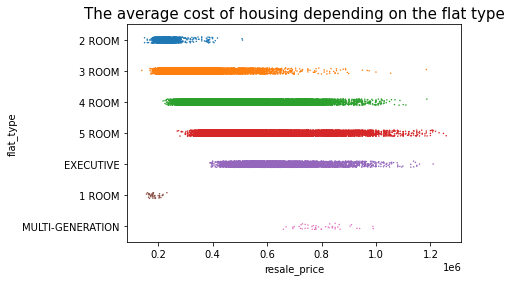

In [ ]:
sns.stripplot(data=df, y="flat_type",
              x='resale_price',
              size=1.5)
plt.title('The average cost of housing depending on the flat type',size=15)

## 9.How are the housing prices in the most expensive town in Singapore?

In [ ]:
bt_price=df[df['town']=='BUKIT TIMAH']
bt_price.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
296,2017-01,BUKIT TIMAH,4 ROOM,4,TOH YI DR,07 TO 09,104.0,Model A,1988,70 years 07 months,670000.0
297,2017-01,BUKIT TIMAH,5 ROOM,5,FARRER RD,10 TO 12,120.0,Standard,1974,56 years 03 months,890000.0
298,2017-01,BUKIT TIMAH,EXECUTIVE,15,TOH YI DR,01 TO 03,146.0,Maisonette,1988,70 years 06 months,876888.0
1427,2017-02,BUKIT TIMAH,3 ROOM,4,QUEEN'S RD,07 TO 09,74.0,Improved,1974,56 years 02 months,425000.0
1428,2017-02,BUKIT TIMAH,5 ROOM,17,TOH YI DR,01 TO 03,122.0,Improved,1988,70 years 05 months,710000.0


Text(0.5, 1.0, 'Histogram of the prices in BUKIT TIMAH')

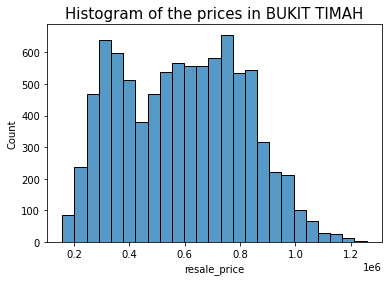

In [ ]:
sns.histplot(data=bt_price,
            x='resale_price',
             bins=25)
plt.title('Histogram of the prices in BUKIT TIMAH',size=15)

## 10. How is price of housing in 'ADMIRALTY DR' street?

In [ ]:
admdr_price=df[df['street_name']=='ADMIRALTY DR']
admdr_price.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
798,2017-01,SEMBAWANG,4 ROOM,467,ADMIRALTY DR,10 TO 12,102.0,Premium Apartment,2001,83 years 06 months,365000.0
800,2017-01,SEMBAWANG,4 ROOM,357,ADMIRALTY DR,04 TO 06,96.0,Premium Apartment,2001,83 years 05 months,380000.0
806,2017-01,SEMBAWANG,5 ROOM,357A,ADMIRALTY DR,10 TO 12,110.0,Premium Apartment,2001,83 years 05 months,415000.0
807,2017-01,SEMBAWANG,5 ROOM,353B,ADMIRALTY DR,04 TO 06,110.0,Improved,2002,84 years,428000.0
1875,2017-02,SEMBAWANG,5 ROOM,357B,ADMIRALTY DR,04 TO 06,110.0,Premium Apartment,2001,83 years 04 months,410000.0


Text(0.5, 1.0, 'The behaviour of housing cost on ADMIRALTY DR street')

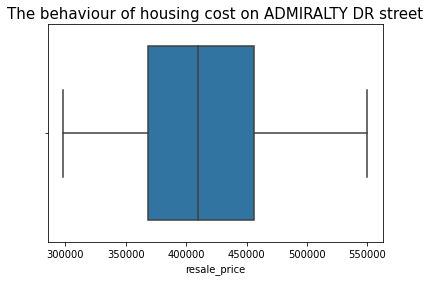

In [ ]:
sns.boxplot(data=admdr_price,
            x='resale_price')
plt.title('The behaviour of housing cost on ADMIRALTY DR street',size=15)

## **Conclusiones**

Con la ayuda de esta base de datos logre comprender la situacion de vivienda en Singapore, ademas descubri que los precios de viviendas en las ciudades mas caras no han cambiando mucho con los años. Tambien descubri que durante la pandemia el precio promedio de vivienda disminuye significativamente y en el momento en que la economia comienza a mejorar despues de la pandemia los precios de la viviendas incrementa exponencialmente, haciendo que los costos sean mucho mas caros a comparacion de antes de la pandemia.  

Durante esta clase aprendi a usar python para visualizar datos y crear diferente tipos de graficas y modelos lineales para predecir los valores. Ademas conoci la herramienta colab, la cual me sera de gran ayuda para el futuro. 
